In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from scipy.signal import medfilt

import sys
sys.path.append("/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev")
from misc import *

In [2]:
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF"

wolf_vid_fs = glob(wolf_dir + "/*")

test_vid_f = wolf_vid_fs[0]

In [3]:
test_vid_f

'/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0156.MP4'

In [4]:
vid = load_video(test_vid_f, frames = 1000)
vid = decrease_res_by_x(vid, int(1920/4), int(1080/4))

In [5]:
b = bs(vid)

09:39:28 - converting list to array
09:39:28 - clipping video based on thresh
09:39:29 - Getting MEDIAN frame
09:39:30 - Getting STD frame
09:39:30 - subtracting mean and dividing std
09:39:30 - creating mask based off of K = 2
09:39:30 - ******** DONE! ********


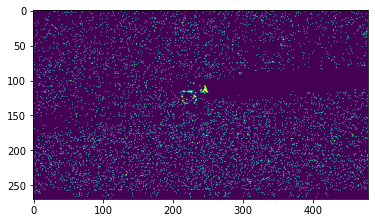

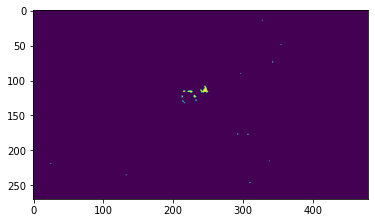

In [6]:

b0=b[0, ...]
bf0 = medfilt(b0)

plt.imshow(b0)
plt.show()
plt.imshow(bf0)
plt.show()

In [7]:
from tqdm import tqdm

filtered = np.zeros(b.shape)
for i, frame in tqdm(enumerate(b)):
    filtered[i, ...] = medfilt(frame)

filtered.shape

1000it [00:45, 21.96it/s]


(1000, 270, 480)

In [8]:
save_video(filtered, 'filt')

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/filt.mp4


In [9]:
save_video(bs, "test")

AttributeError: 'function' object has no attribute 'astype'

In [10]:
wolf_activation = np.sum(filtered.reshape((1000, -1)), axis = 1)
wolf_activation.shape

(1000,)

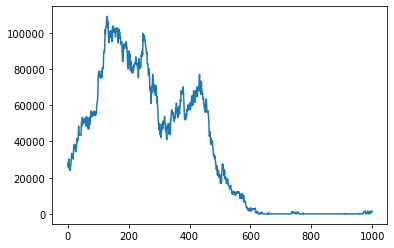

In [11]:
plt.plot(wolf_activation)

/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0186.MP4
video shape: (1000, 1080, 1920)
video shape: (1000, 1080, 1920)


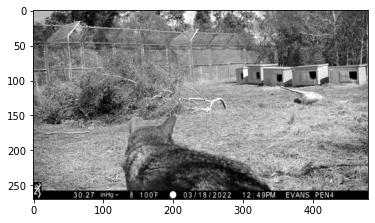

09:49:44 - converting list to array
09:49:44 - clipping video based on thresh
09:49:45 - Getting MEDIAN frame
09:49:46 - Getting STD frame
09:49:46 - subtracting mean and dividing std
09:49:47 - creating mask based off of K = 2
09:49:47 - ******** DONE! ********


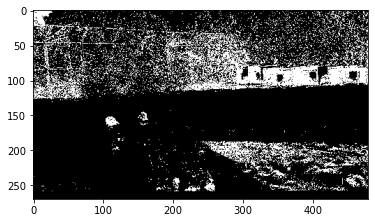

In [4]:
"""
frame filter:
    decrease resolution of video (vid/4)
    perform background suppression on video 
    use a median filter to denoise frames (save this somewhere)
    
    if activation is above (0.01)*(frame area) then there is a wolf in there
    get a list of indices where activation is 1 and 0. 
    write on original video "wolf"/"no wolf" at those indices
    save manipulated video
"""

#load new video 
vid = load_video(wolf_vid_fs[40], 1000)
print(wolf_vid_fs[40])
print("video shape:", vid.shape)
# decrease res by 4x
res_vid = decrease_res_by_x(vid, int(vid.shape[2]/4), int(vid.shape[1]/4))
print("video shape:", vid.shape)

# plt.imshow(res_vid[1, ...], cmap = 'gray')
# plt.show()

vid_bs = bs(res_vid)
# plt.imshow(vid_bs[40, ...], cmap = 'gray')
# plt.show()

1000it [00:49, 20.27it/s]


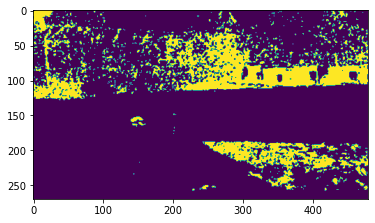

In [5]:
from tqdm import tqdm
filtered = np.zeros(vid_bs.shape)
for i, frame in tqdm(enumerate(vid_bs)):
    filtered[i, ...] = medfilt(frame)
    
plt.imshow(filtered[1, ...])
plt.show()
    

255.0

In [7]:
"""
look at amount of activation

"""

wolf_activation = np.sum(filtered.reshape((filtered.shape[0], -1)), \
                         axis = 1)/(filtered.shape[1]*filtered.shape[2]*255)

# clipping suppresses noise in the beginning... temporary fix tho
activation_clipped =  np.clip(wolf_activation, np.percentile(wolf_activation, 1),\
                              np.percentile(wolf_activation, 95))

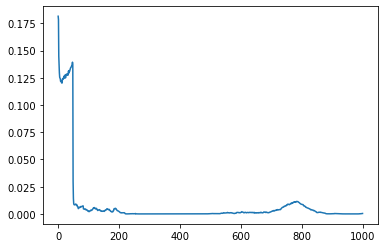

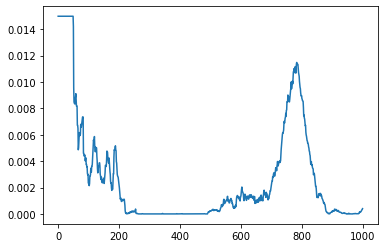

In [8]:
# plt.plot(wolf_activation)
# plt.show()
# plt.plot(activation_clipped)
# plt.show()

In [9]:
save_video(filtered, "filteredIMG_0186")
save_video(vid_bs, "bsIMG_0186")

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/filteredIMG_0186.mp4
/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/bsIMG_0186.mp4


In [10]:
frames_w_wolves = np.zeros(activation_clipped.shape)
MOVEMENT_THRESH = 0.2/100  # .2% activation means there is enough mvmt for a trigger
mvmt_idx = np.where(activation_clipped > MOVEMENT_THRESH)
frames_w_wolves[mvmt_idx] = 1


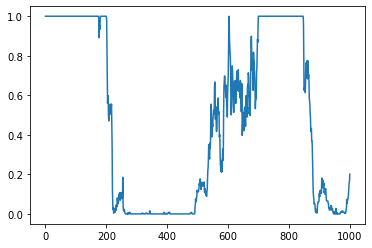

In [11]:
P_wolf_present = activation_clipped/MOVEMENT_THRESH
P_wolf_present[P_wolf_present >= 1] = 1
plt.plot(P_wolf_present)

In [12]:
vid = load_video(wolf_vid_fs[40], 1000)


In [13]:
save_video_w_mvmt_annotations(vid, P_wolf_present, "P_wolf_present")

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/P_wolf_present.mp4
